# 1. Problem Definition

Financial institutions suffer significant losses due to borrower loan defaults.  
Early identification of high-risk borrowers is essential to reduce financial risk and improve recovery efficiency.

This project aims to build a Machine Learning model that predicts whether a borrower will default based on financial and demographic features.


In [1]:
import pandas as pd
import numpy as np

## 2. Data Ingestion & Initial EDA
## 2.1 Data Loading

### Why This Step is Used

Data loading is the first step in the machine learning workflow.  
It allows us to import the dataset into the working environment for analysis and model development.


In [2]:
loan=pd.read_csv("Loan_Default.csv")
loan.head()

,bank_name,applicant_name,ID,address,state,country,age,Gender,occupation_type,income,...,occupancy_type,Secured_by,Security_Type,applicant_assurity,Credit_Score,co-applicant_credit_type,open_credit,LTV,dtir1,Status
0,State Bank of India (SBI),Ramesh Kumar,24890,Thillai Nagar,Tamil Nadu,India,34,Female,Business,541952,...,pr,home,direct,Guarantor,758,CIB,nopc,98.728814,45.00,1
1,State Bank of India (SBI),Arun Kumar,24891,Srirangam,Tamil Nadu,India,61,Male,Salaried,1582440,...,pr,home,direct,Gold,552,EXP,nopc,64.460000,33.74,1
2,State Bank of India (SBI),Anand Krishnan,24892,Srirangam,Tamil Nadu,India,59,Male,Salaried,733520,...,pr,home,direct,Property,834,CIB,nopc,80.019685,46.00,0
3,State Bank of India (SBI),Suresh Iyer,24893,BHEL Township,Tamil Nadu,India,36,Male,Self-Employed,750034,...,pr,home,direct,Gold,587,CIB,nopc,69.376900,42.00,0
4,State Bank of India (SBI),Ramesh Sharma,24894,Cantonment,Tamil Nadu,India,52,Male,Salaried,1888946,...,pr,home,direct,Gold,602,EXP,nopc,91.886544,39.00,0


### Observation

- The dataset has been successfully loaded.
- It contains borrower-related financial information.
- The dataset is ready for structural analysis.


## CSV to SQlite


In [3]:
import sqlite3
conn = sqlite3.connect("creditpathai.db")
loan_sql = pd.read_csv("Loan_Default.csv")
loan_sql.to_sql("loan_data", conn, if_exists="replace", index=False)
print("CSV successfully ingested into SQLite database.")


CSV successfully ingested into SQLite database.


In [4]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables inside database:", tables)


Tables inside database: [('processed_loans',), ('loan_data',)]


In [5]:
cursor.execute("SELECT COUNT(*) FROM loan_data;")
row_count = cursor.fetchone()
print("Total rows stored in SQLite:", row_count[0])


Total rows stored in SQLite: 148670


In [6]:
conn.close()
print("Database connection closed.")


Database connection closed.


## EDA from SQLite Tables

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("creditpathai.db")

In [8]:
df_db = pd.read_sql("SELECT * FROM loan_data", conn)
df_db.head()

,bank_name,applicant_name,ID,address,state,country,age,Gender,occupation_type,income,...,occupancy_type,Secured_by,Security_Type,applicant_assurity,Credit_Score,co-applicant_credit_type,open_credit,LTV,dtir1,Status
0,State Bank of India (SBI),Ramesh Kumar,24890,Thillai Nagar,Tamil Nadu,India,34,Female,Business,541952,...,pr,home,direct,Guarantor,758,CIB,nopc,98.728814,45.00,1
1,State Bank of India (SBI),Arun Kumar,24891,Srirangam,Tamil Nadu,India,61,Male,Salaried,1582440,...,pr,home,direct,Gold,552,EXP,nopc,64.460000,33.74,1
2,State Bank of India (SBI),Anand Krishnan,24892,Srirangam,Tamil Nadu,India,59,Male,Salaried,733520,...,pr,home,direct,Property,834,CIB,nopc,80.019685,46.00,0
3,State Bank of India (SBI),Suresh Iyer,24893,BHEL Township,Tamil Nadu,India,36,Male,Self-Employed,750034,...,pr,home,direct,Gold,587,CIB,nopc,69.376900,42.00,0
4,State Bank of India (SBI),Ramesh Sharma,24894,Cantonment,Tamil Nadu,India,52,Male,Salaried,1888946,...,pr,home,direct,Gold,602,EXP,nopc,91.886544,39.00,0


In [9]:
df_db.shape
df_db.info()
df_db.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   bank_name                    148670 non-null  object 
 1   applicant_name               148670 non-null  object 
 2   ID                           148670 non-null  int64  
 3   address                      148670 non-null  object 
 4   state                        148670 non-null  object 
 5   country                      148670 non-null  object 
 6   age                          148670 non-null  int64  
 7   Gender                       148670 non-null  object 
 8   occupation_type              148670 non-null  object 
 9   income                       148670 non-null  int64  
 10  Region                       148670 non-null  object 
 11  year                         148670 non-null  int64  
 12  application_date             148670 non-null  object 
 13 

,ID,age,income,year,loan_amount,rate_of_interest,bank_interest_rate,Interest_rate_spread,property_value,Credit_Score,LTV,dtir1,Status
count,148670.000000,148670.000000,1.486700e+05,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,42.497653,1.099336e+06,2019.0,2.556604e+06,10.000648,9.998339,0.333997,8.631196e+05,699.789103,72.228903,37.293422,0.246445
std,42917.476598,12.667294,5.199060e+05,0.0,1.415063e+06,0.865737,0.865275,0.778188,1.345689e+06,115.875857,38.251649,11.317524,0.430942
min,24890.000000,21.000000,2.000030e+05,2019.0,1.000230e+05,8.500000,8.500000,-3.638000,8.000000e+03,500.000000,0.967478,5.000000,0.000000
25%,62057.250000,32.000000,6.497780e+05,2019.0,1.331179e+06,9.250000,9.250000,-0.030600,2.880000e+05,599.000000,59.892086,30.000000,0.000000
50%,99224.500000,42.000000,1.100510e+06,2019.0,2.561114e+06,10.000000,10.000000,0.346500,4.580000e+05,699.000000,74.581590,38.580000,0.000000
75%,136391.750000,53.000000,1.549616e+06,2019.0,3.782377e+06,10.750000,10.750000,0.790200,7.180000e+05,800.000000,85.614525,45.000000,0.000000
max,173559.000000,64.000000,1.999994e+06,2019.0,4.999984e+06,11.500000,11.500000,3.357000,1.650800e+07,900.000000,7831.250000,61.000000,1.000000


In [10]:
df_db["Status"].value_counts()
df_db["Status"].value_counts(normalize=True)

Status
0    0.753555
1    0.246445
Name: proportion, dtype: float64

In [11]:
conn.close()

## 2.2 Dataset Structure Overview


### Why This Step is Used

Examining column names helps us understand:
- Available features
- Target variable
- Financial and categorical attributes


In [12]:
print(loan.columns)

Index(['bank_name', 'applicant_name', 'ID', 'address', 'state', 'country',
       'age', 'Gender', 'occupation_type', 'income', 'Region', 'year',
       'application_date', 'submission_of_application',
       'application_submission_mode', 'loan_type', 'loan_purpose',
       'loan_limit', 'approv_in_adv', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'bank_interest_rate', 'Interest_rate_spread',
       'property_value', 'occupancy_type', 'Secured_by', 'Security_Type',
       'applicant_assurity', 'Credit_Score', 'co-applicant_credit_type',
       'open_credit', 'LTV', 'dtir1', 'Status'],
      dtype='object')


### Observation

- The dataset contains both input features and a target variable.
- Feature names indicate financial and demographic borrower details.
- These features will be used for analysis and prediction.


##  Data Validation


##  Dataset Dimensions (Rows & Columns)

### Why This Step is Used

Checking dataset dimensions helps us understand:
- Total number of records (rows)
- Total number of features (columns)

This gives an idea of dataset size and complexity.


In [13]:
print('No.of rows:',loan.shape[0])
print('No.of columns:',loan.shape[1])

No.of rows: 148670
No.of columns: 35


### Observation

- The dataset contains a sufficient number of records.
- Multiple features are available for model training.
- The dataset size is appropriate for machine learning analysis.


##  Dataset Information

### Why This Step is Used

The `.info()` function provides:
- Data types of each column
- Non-null value count
- Memory usage

This helps in understanding feature structure.


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   bank_name                    148670 non-null  object 
 1   applicant_name               148670 non-null  object 
 2   ID                           148670 non-null  int64  
 3   address                      148670 non-null  object 
 4   state                        148670 non-null  object 
 5   country                      148670 non-null  object 
 6   age                          148670 non-null  int64  
 7   Gender                       148670 non-null  object 
 8   occupation_type              148670 non-null  object 
 9   income                       148670 non-null  int64  
 10  Region                       148670 non-null  object 
 11  year                         148670 non-null  int64  
 12  application_date             148670 non-null  object 
 13 

### Observation

- The dataset contains both numerical and categorical features.
- No missing values are observed (handled during Excel preprocessing).
- Data types are clearly identified for further processing.


## Checking Data Types

### Why This Step is Used

Machine Learning models require numerical inputs.  
Identifying data types helps us determine which columns require encoding.


In [15]:
loan.dtypes

bank_name                       object
applicant_name                  object
ID                               int64
address                         object
state                           object
country                         object
age                              int64
Gender                          object
occupation_type                 object
income                           int64
Region                          object
year                             int64
application_date                object
submission_of_application       object
application_submission_mode     object
loan_type                       object
loan_purpose                    object
loan_limit                      object
approv_in_adv                   object
business_or_commercial          object
loan_amount                      int64
rate_of_interest               float64
bank_interest_rate             float64
Interest_rate_spread           float64
property_value                   int64
occupancy_type           

### Observation

- Numerical columns can be directly used for modeling.
- Categorical columns will require encoding techniques.
- Dataset structure is ready for preprocessing.


## 2.3 Data Validation


### Why This Step is Used

Duplicate records can bias model performance and distort analysis.  
It is important to ensure dataset uniqueness before training.


In [16]:
print(loan.isnull().sum())

bank_name                      0
applicant_name                 0
ID                             0
address                        0
state                          0
country                        0
age                            0
Gender                         0
occupation_type                0
income                         0
Region                         0
year                           0
application_date               0
submission_of_application      0
application_submission_mode    0
loan_type                      0
loan_purpose                   0
loan_limit                     0
approv_in_adv                  0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
bank_interest_rate             0
Interest_rate_spread           0
property_value                 0
occupancy_type                 0
Secured_by                     0
Security_Type                  0
applicant_assurity             0
Credit_Score                   0
co-applica

In [17]:
print(loan.duplicated().sum())

0


### Observation

- Duplicate records are checked.
- If duplicates exist, they must be removed.
- The dataset integrity is maintained after validation.


## 2.4 Target Variable Analysis


### Why This Step is Used

Understanding the distribution of the target variable (Status) is crucial before modeling.

It helps determine:
- Whether the dataset is balanced or imbalanced
- The proportion of Default (1) and Non-Default (0) borrowers


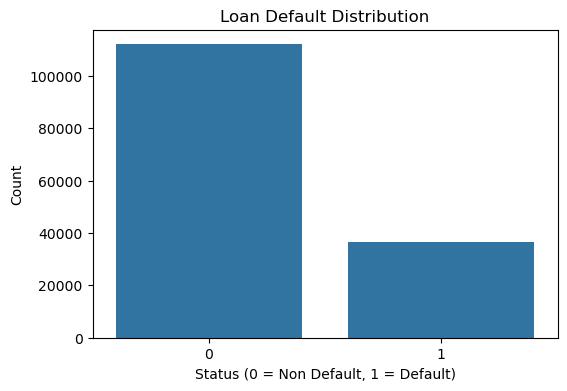


Default Percentage:
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x="Status",data=loan)
plt.title("Loan Default Distribution")
plt.xlabel("Status (0 = Non Default, 1 = Default)")
plt.ylabel("Count")
plt.show()
print("\nDefault Percentage:")
print(loan["Status"].value_counts(normalize=True) * 100)
           

### Observation

- The countplot shows the distribution of loan default status.
- If one class significantly dominates, the dataset is imbalanced.
- Class imbalance may affect model performance and require handling.


## 2.5 Exploratory Data Analysis


### 2.5.1 Credit Score vs Loan Default


#### Why This Step is Used

Credit Score is a key financial indicator of a borrower’s repayment ability.  
Analyzing its relationship with default status helps identify risk patterns.


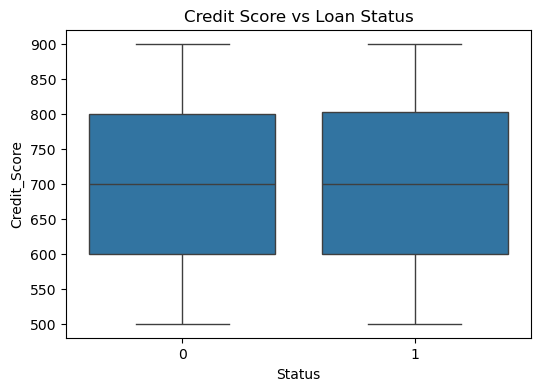

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Status",y="Credit_Score",data=loan)
plt.title("Credit Score vs Loan Status")
plt.show()

#### Observation

- Borrowers with lower credit scores tend to default more frequently.
- Credit Score appears to have a strong influence on loan repayment behavior.


### 2.5.2 Income vs Loan Default


#### Why This Step is Used

Income represents the borrower’s financial strength.  
Lower income levels may increase the probability of loan default.


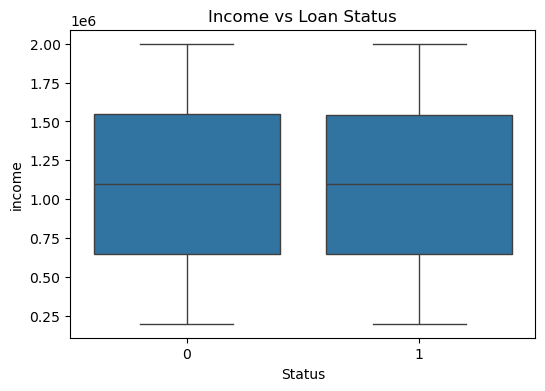

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Status", y="income", data=loan)
plt.title("Income vs Loan Status")
plt.show()

#### Observation

- Borrowers with lower income show higher default tendency.
- Income is an important financial factor influencing repayment.


### 2.5.3 Loan Amount vs Loan Default


#### Why This Step is Used

Higher loan amounts may increase financial burden,  
which can lead to increased default risk.


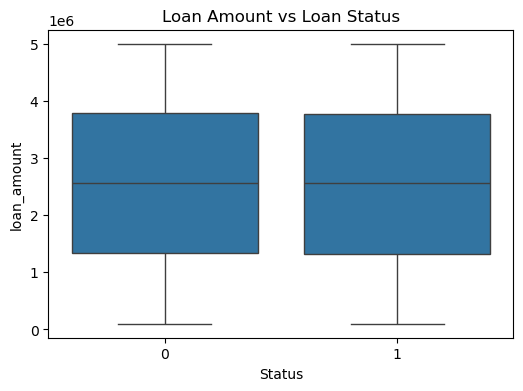

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Status", y="loan_amount", data=loan)
plt.title("Loan Amount vs Loan Status")
plt.show()

#### Observation

- Larger loan amounts show variation across default categories.
- Loan amount may contribute to repayment difficulty.


### 2.5.4 Loan Type vs Loan Default


#### Why This Step is Used

Different loan types may carry different levels of risk.  
Analyzing loan type distribution helps identify high-risk categories.


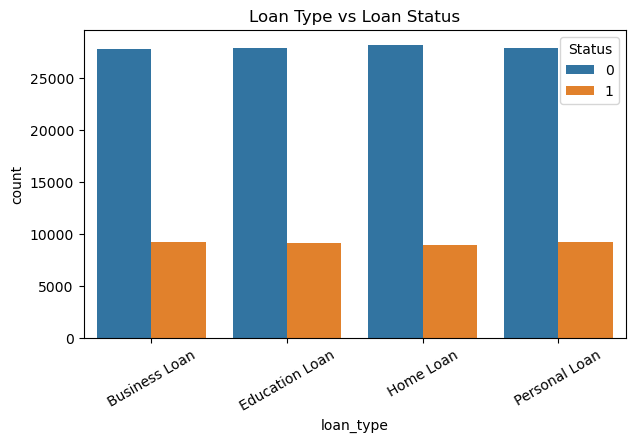

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(x="loan_type", hue="Status", data=loan)
plt.title("Loan Type vs Loan Status")
plt.xticks(rotation=30)
plt.show()

#### Observation

- Certain loan types show higher default proportions.
- Loan Type is a categorical feature that requires encoding for modeling.


# 3. Feature Engineering
## 3.1 Label Encoding


### Why This Step is Used

Machine Learning models require numerical input data.  
Binary categorical features are converted into numerical format 
using Label Encoding.


In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
loan = pd.read_csv("Loan_Default.csv")

label_cols = [
    "Gender",
    "loan_limit",
    "approv_in_adv",
    "business_or_commercial",
    "occupancy_type",
    "Secured_by",
    "open_credit"
]

for col in label_cols:
    
    
    le = LabelEncoder()
    encoded_values = le.fit_transform(loan[col])
    mapping = pd.DataFrame({
        "Original Value": le.classes_,
        "Encoded Value": range(len(le.classes_))
    })
    
    print(mapping)
    loan[col] = encoded_values


  Original Value  Encoded Value
0         Female              0
1           Male              1
  Original Value  Encoded Value
0           High              0
1            Low              1
2             cf              2
3            ncf              3
  Original Value  Encoded Value
0             No              0
1            Yes              1
2          nopre              2
3            pre              3
  Original Value  Encoded Value
0            b/c              0
1          nob/c              1
  Original Value  Encoded Value
0             ir              0
1             pr              1
2             sr              2
  Original Value  Encoded Value
0           home              0
1           land              1
  Original Value  Encoded Value
0           nopc              0
1            opc              1


### Observation

- Binary categorical columns are identified.
- Categories are mapped into numerical values.
- The transformation prepares features for machine learning algorithms.


## 3.2 One-Hot Encoding


### Why This Step is Used

Categorical variables with more than two categories 
cannot be encoded using simple label encoding.

One-Hot Encoding creates separate binary columns for each category 
to avoid introducing ordinal relationships.


In [24]:
onehot_cols = [
    "occupation_type",
    "Region",
    "loan_type",
    "loan_purpose",
    "Security_Type",
    "applicant_assurity",
    "co-applicant_credit_type",
    "application_submission_mode",
    "submission_of_application"
]

print("Applying One-Hot Encoding...\n")
loan = pd.get_dummies(
    loan,
    columns=onehot_cols,
    drop_first=True
)

print("One-Hot Encoding Applied Successfully")
print("New Dataset Shape:", loan.shape)

print("\nUpdated Column Names:\n")
print(loan.columns)


Applying One-Hot Encoding...

One-Hot Encoding Applied Successfully
New Dataset Shape: (148670, 49)

Updated Column Names:

Index(['bank_name', 'applicant_name', 'ID', 'address', 'state', 'country',
       'age', 'Gender', 'income', 'year', 'application_date', 'loan_limit',
       'approv_in_adv', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'bank_interest_rate', 'Interest_rate_spread',
       'property_value', 'occupancy_type', 'Secured_by', 'Credit_Score',
       'open_credit', 'LTV', 'dtir1', 'Status', 'occupation_type_Professional',
       'occupation_type_Salaried', 'occupation_type_Self-Employed',
       'Region_North-East', 'Region_central', 'Region_south',
       'loan_type_Education Loan', 'loan_type_Home Loan',
       'loan_type_Personal Loan', 'loan_purpose_Debt Consolidation',
       'loan_purpose_Education', 'loan_purpose_House Purchase',
       'loan_purpose_Medical', 'Security_Type_direct',
       'applicant_assurity_Guarantor', 'applicant_assurity

### Observation

- Multi-category features are successfully expanded into dummy variables.
- Each category is represented as a separate binary column.
- The dataset structure is now suitable for machine learning processing.


In [25]:
drop_cols = [
    "bank_name",
    "applicant_name",
    "address",
    "state",
    "country",
    "application_date"
]

loan.drop(columns=drop_cols, inplace=True)


In [26]:
loan.to_csv("Loan_Default_Preprocessed.csv", index=False)


## 3. Storing Preprocessed Dataset in SQLite


In [27]:
import sqlite3

conn = sqlite3.connect("creditpathai.db")


In [28]:
processed_df = pd.read_csv("Loan_Default_Preprocessed.csv")
processed_df.to_sql("processed_loans", conn, if_exists="replace", index=False)
print("Preprocessed dataset stored in SQLite.")


Preprocessed dataset stored in SQLite.


In [29]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables:", cursor.fetchall())


Tables: [('loan_data',), ('processed_loans',)]


In [30]:
conn.close()


In [31]:
loan.columns


Index(['ID', 'age', 'Gender', 'income', 'year', 'loan_limit', 'approv_in_adv',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'bank_interest_rate', 'Interest_rate_spread', 'property_value',
       'occupancy_type', 'Secured_by', 'Credit_Score', 'open_credit', 'LTV',
       'dtir1', 'Status', 'occupation_type_Professional',
       'occupation_type_Salaried', 'occupation_type_Self-Employed',
       'Region_North-East', 'Region_central', 'Region_south',
       'loan_type_Education Loan', 'loan_type_Home Loan',
       'loan_type_Personal Loan', 'loan_purpose_Debt Consolidation',
       'loan_purpose_Education', 'loan_purpose_House Purchase',
       'loan_purpose_Medical', 'Security_Type_direct',
       'applicant_assurity_Guarantor', 'applicant_assurity_Property',
       'co-applicant_credit_type_EXP',
       'application_submission_mode_Branch Visit',
       'application_submission_mode_Online',
       'submission_of_application_Branch', 'submission_of_applicat

In [32]:
loan.select_dtypes(include="object")


""
0
1
2
3
4
...
148665
148666
148667
148668


In [33]:
X=loan.drop("Status",axis=1)
y=loan["Status"]
print("Features shape:",X.shape)
print("Target shape:",y.shape)

Features shape: (148670, 42)
Target shape: (148670,)


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print("Training set shape:",X_train.shape)
print("Testing set shape:",X_test.shape)

Training set shape: (118936, 42)
Testing set shape: (29734, 42)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print("Scaling method")
print("Scaled training shape:",X_train_scaled.shape)
print("Scaled testing shape:",X_test_scaled.shape)

Scaling method
Scaled training shape: (118936, 42)
Scaled testing shape: (29734, 42)


In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.7799825116028789
Precision: 0.5425140631761143
Recall   : 0.6843613537117904
F1 Score : 0.6052377504223992


In [38]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8223116787865228


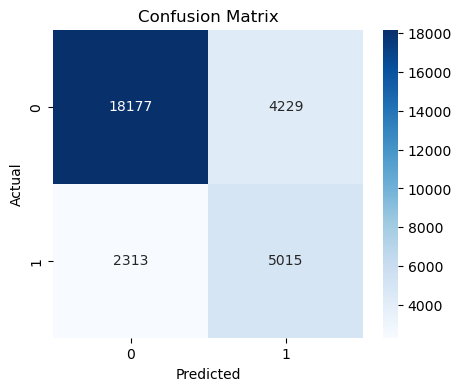

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [40]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [41]:
from xgboost import XGBClassifier


## 5.1 Advanced Model – XGBoost (Baseline)


In [42]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)   
print("XGBoost model trained successfully.")

C:\Users\joech\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:200: UserWarning: [19:31:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_xgb))


Accuracy : 0.9333759332750386
Precision: 0.958812424918483
Recall   : 0.7624181222707423
F1 Score : 0.8494108703914861
ROC-AUC  : 0.9752009194550586


In [44]:
print(X_train.columns)

Index(['ID', 'age', 'Gender', 'income', 'year', 'loan_limit', 'approv_in_adv',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'bank_interest_rate', 'Interest_rate_spread', 'property_value',
       'occupancy_type', 'Secured_by', 'Credit_Score', 'open_credit', 'LTV',
       'dtir1', 'occupation_type_Professional', 'occupation_type_Salaried',
       'occupation_type_Self-Employed', 'Region_North-East', 'Region_central',
       'Region_south', 'loan_type_Education Loan', 'loan_type_Home Loan',
       'loan_type_Personal Loan', 'loan_purpose_Debt Consolidation',
       'loan_purpose_Education', 'loan_purpose_House Purchase',
       'loan_purpose_Medical', 'Security_Type_direct',
       'applicant_assurity_Guarantor', 'applicant_assurity_Property',
       'co-applicant_credit_type_EXP',
       'application_submission_mode_Branch Visit',
       'application_submission_mode_Online',
       'submission_of_application_Branch', 'submission_of_application_Online',
    

## 5.2 Hyperparameter Tuning – XGBoost


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\joech\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:200: UserWarning: [19:32:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [46]:
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
print("Tuned ROC-AUC:", roc_auc_score(y_test, y_prob_best))


Tuned ROC-AUC: 0.9786455018092082


In [47]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("creditpathai.db")

processed_df = pd.read_csv("Loan_Default_Preprocessed.csv")

processed_df.to_sql("processed_loans", conn, if_exists="replace", index=False)

print("Preprocessed CSV stored in database.")

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables:", cursor.fetchall())

conn.close()

Preprocessed CSV stored in database.
Tables: [('loan_data',), ('processed_loans',)]
